# Importing libraries

In [152]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import folium

# Reading and exploring  the dataset

In [153]:
df= pd.read_csv('listings.csv')

In [154]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

In [156]:
#df.describe()

## Check how many rows and columns the dataset is having and how many unique values are present for each column.

In [157]:
print('\nRows : ',df.shape[0])
print('\nColumns :', df.shape[1])
print('\nColumns:',df.columns.to_list())
print(' \nUnique:\n',df.nunique())


Rows :  7608

Columns : 18

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Unique:
 id                                7608
name                              3585
host_id                           6571
host_name                         3031
neighbourhood_group                  0
neighbourhood                       22
latitude                          5196
longitude                         6137
room_type                            4
price                              626
minimum_nights                      48
number_of_reviews                  478
last_review                        977
reviews_per_month                  637
calculated_host_listings_count      17
availability_365                   366
number_of_reviews_ltm              1

# Drop unnecessary columns and Handle missing values

In [158]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
dtype: int64

In [159]:
df.duplicated().sum()

0

In [161]:
# Drop unnecessary columns
columns_to_drop = ['latitude','longitude', 'neighbourhood_group', 'last_review', 'license','number_of_reviews_ltm']
df = df.drop(columns=columns_to_drop)



# Handle missing values
#df.dropna(subset=['price', 'availability_365', 'latitude', 'longitude', 'room_type'], inplace=True)

#df['reviews_per_month'].fillna(0, inplace=True)  # Assuming missing values in reviews_per_month indicate no reviews
# You can apply similar techniques for other columns with missing values


In [162]:
df.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 710
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [163]:
df.fillna({'reviews_per_month':0},inplace=True)

In [164]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [165]:
df.tail(3)

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
7605,906161615984076237,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,23932215,Sabine,De Baarsjes - Oud-West,Entire home/apt,359,2,0,0.0,1,18
7606,906312347067677212,Home in Amsterdam · ★New · 2 bedrooms · 2 beds...,4437313,Melianthe,Zuid,Entire home/apt,223,1,0,0.0,1,73
7607,906313802809767607,Condo in Amsterdam · ★New · 1 bedroom · 1 bed ...,70167802,Luc,De Baarsjes - Oud-West,Entire home/apt,139,2,0,0.0,1,100


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood                   7608 non-null   object 
 5   room_type                       7608 non-null   object 
 6   price                           7608 non-null   int64  
 7   minimum_nights                  7608 non-null   int64  
 8   number_of_reviews               7608 non-null   int64  
 9   reviews_per_month               7608 non-null   float64
 10  calculated_host_listings_count  7608 non-null   int64  
 11  availability_365                7608 non-null   int64  
dtypes: float64(1), int64(7), object(4)

In [167]:
print('\nCategorical Columns\n')
df.select_dtypes(include=['O']).nunique()


Categorical Columns



name             3585
host_name        3031
neighbourhood      22
room_type           4
dtype: int64

# summary statistics for numerical columns in the DataFrame

In [169]:
summary_stats = df.describe()

In [170]:
summary_stats 

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.608000e+03,7.608000e+03,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,2.328487e+17,1.032177e+08,251.065589,4.914564,47.499211,1.061130,1.798896,79.586619
std,3.489604e+17,1.393419e+08,263.170218,33.263777,106.402516,2.266514,2.590756,106.483001
min,2.818000e+03,3.159000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.696009e+07,9.937172e+06,148.000000,2.000000,3.000000,0.200000,1.000000,0.000000
50%,3.822749e+07,3.501297e+07,202.000000,3.000000,11.000000,0.480000,1.000000,21.000000
75%,6.525168e+17,1.402245e+08,300.000000,4.000000,40.000000,1.110000,1.000000,145.000000
max,9.071470e+17,5.183111e+08,12000.000000,1001.000000,2720.000000,114.930000,22.000000,365.000000


# Data Exploration and Visualization

## 1. What can we learn about different hosts and areas?

In [171]:
host_areas =df.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(5)
     


,host_name,calculated_host_listings_count
2708,Sweets,22
1138,Hotel Not Hotel,21
2125,Neal Estate,18
232,Arnold,17
824,Eva & Kobe,16


## We find that Host name Sweets  has listed highest number of listings  followed by Hotel Not Hotel	

# 2.What we learn from room type and their prices according to area?

In [172]:
room_price_area_wise = df.groupby(['room_type'])['price'].max().reset_index()
room_price_area_wise.sort_values(by='price', ascending=False).head(10)
     


,room_type,price
2,Private room,12000
0,Entire home/apt,10000
3,Shared room,1150
1,Hotel room,1089


# Visualize the data

<Axes: >

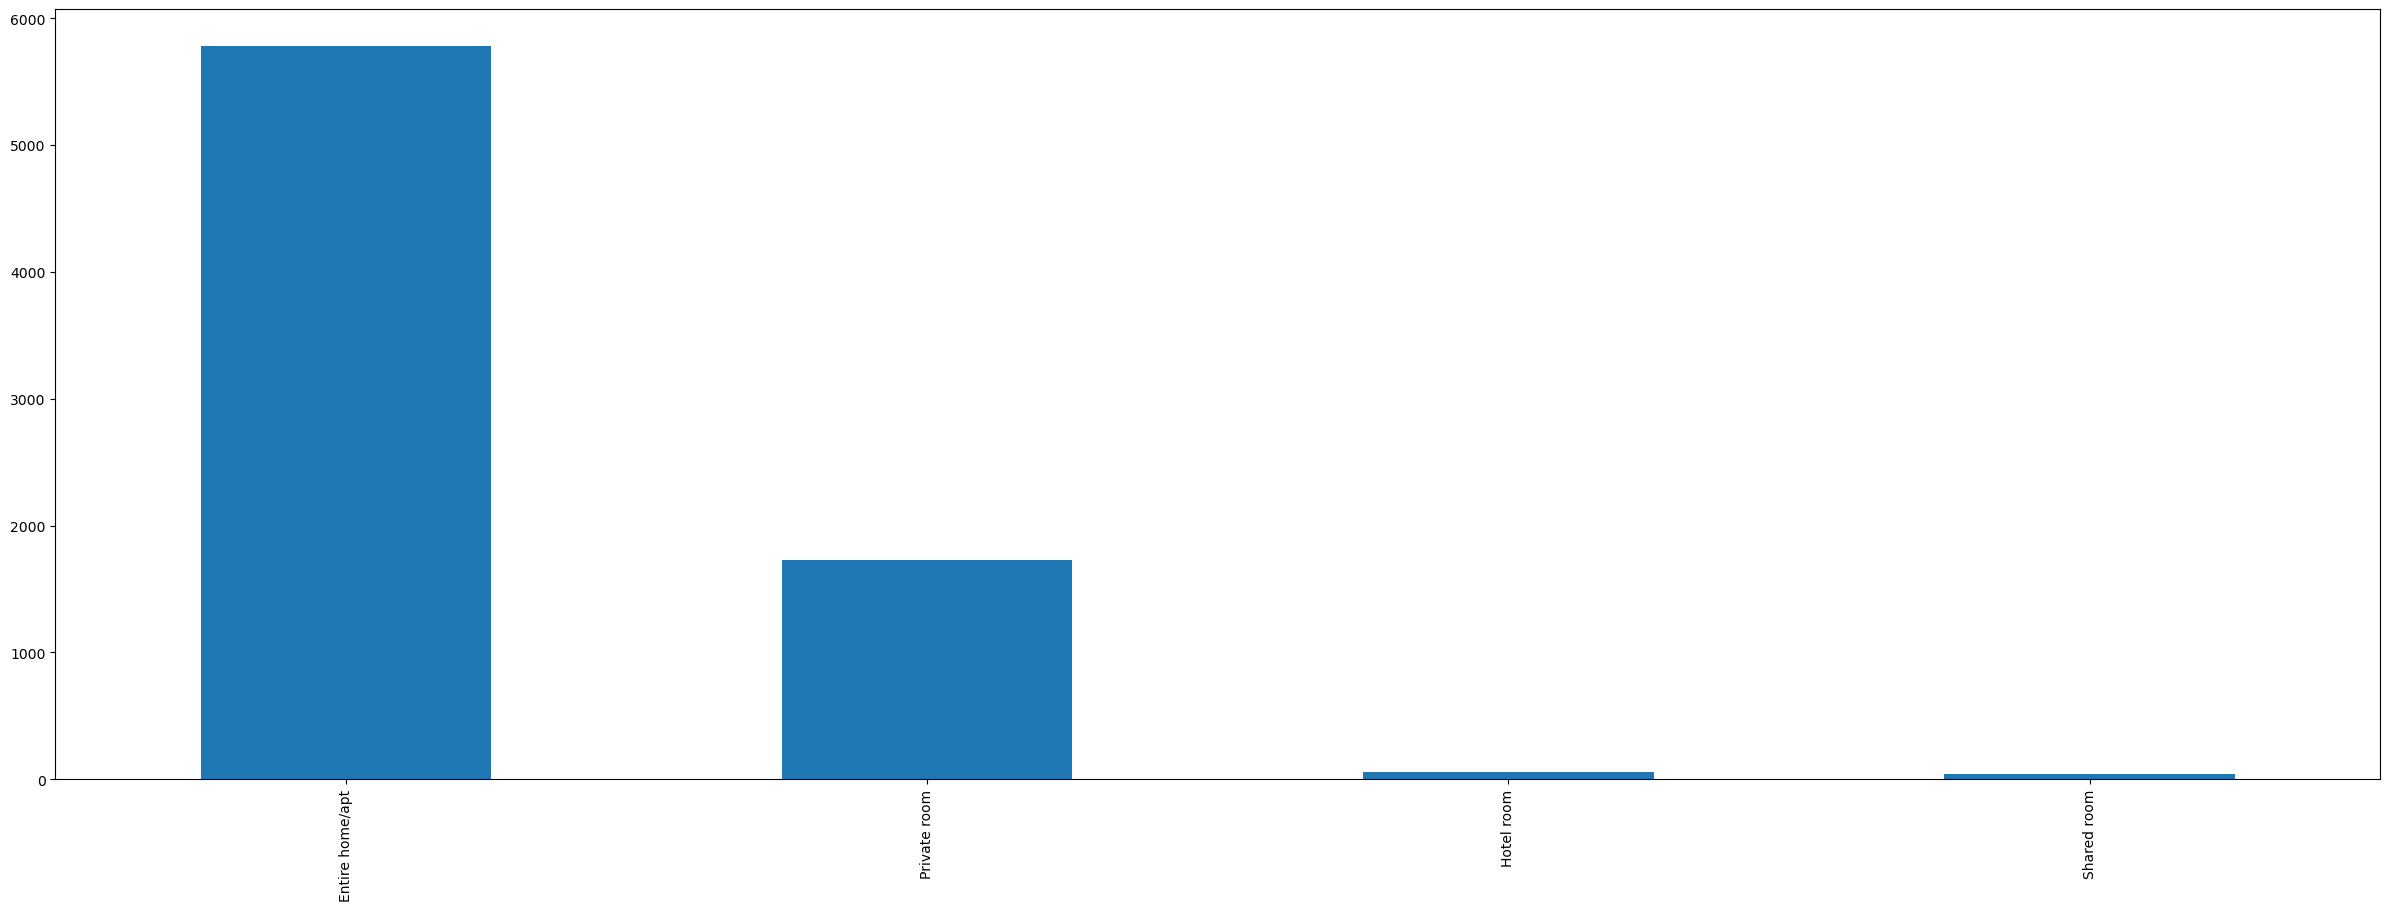

In [173]:
df['room_type'].value_counts().plot.bar()

# we found that Entire home/apt is the highest number of room types overall

# 3.What can we learn from Data? (ex: locations, prices, reviews, etc)

In [174]:
df.head(3)

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,Oostelijk Havengebied - Indische Buurt,Private room,69,3,336,1.95,1,7
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,Centrum-Oost,Private room,106,1,339,2.10,2,0
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,De Pijp - Rivierenbuurt,Entire home/apt,270,4,23,0.16,1,2


In [175]:
area_reviews = df.groupby(['neighbourhood'])['number_of_reviews'].max().reset_index()
area_reviews
     

,neighbourhood,number_of_reviews
0,Bijlmer-Centrum,556
1,Bijlmer-Oost,338
2,Bos en Lommer,399
3,Buitenveldert - Zuidas,399
4,Centrum-Oost,1134
5,Centrum-West,1005
6,De Aker - Nieuw Sloten,518
7,De Baarsjes - Oud-West,1934
8,De Pijp - Rivierenbuurt,751
9,Gaasperdam - Driemond,406


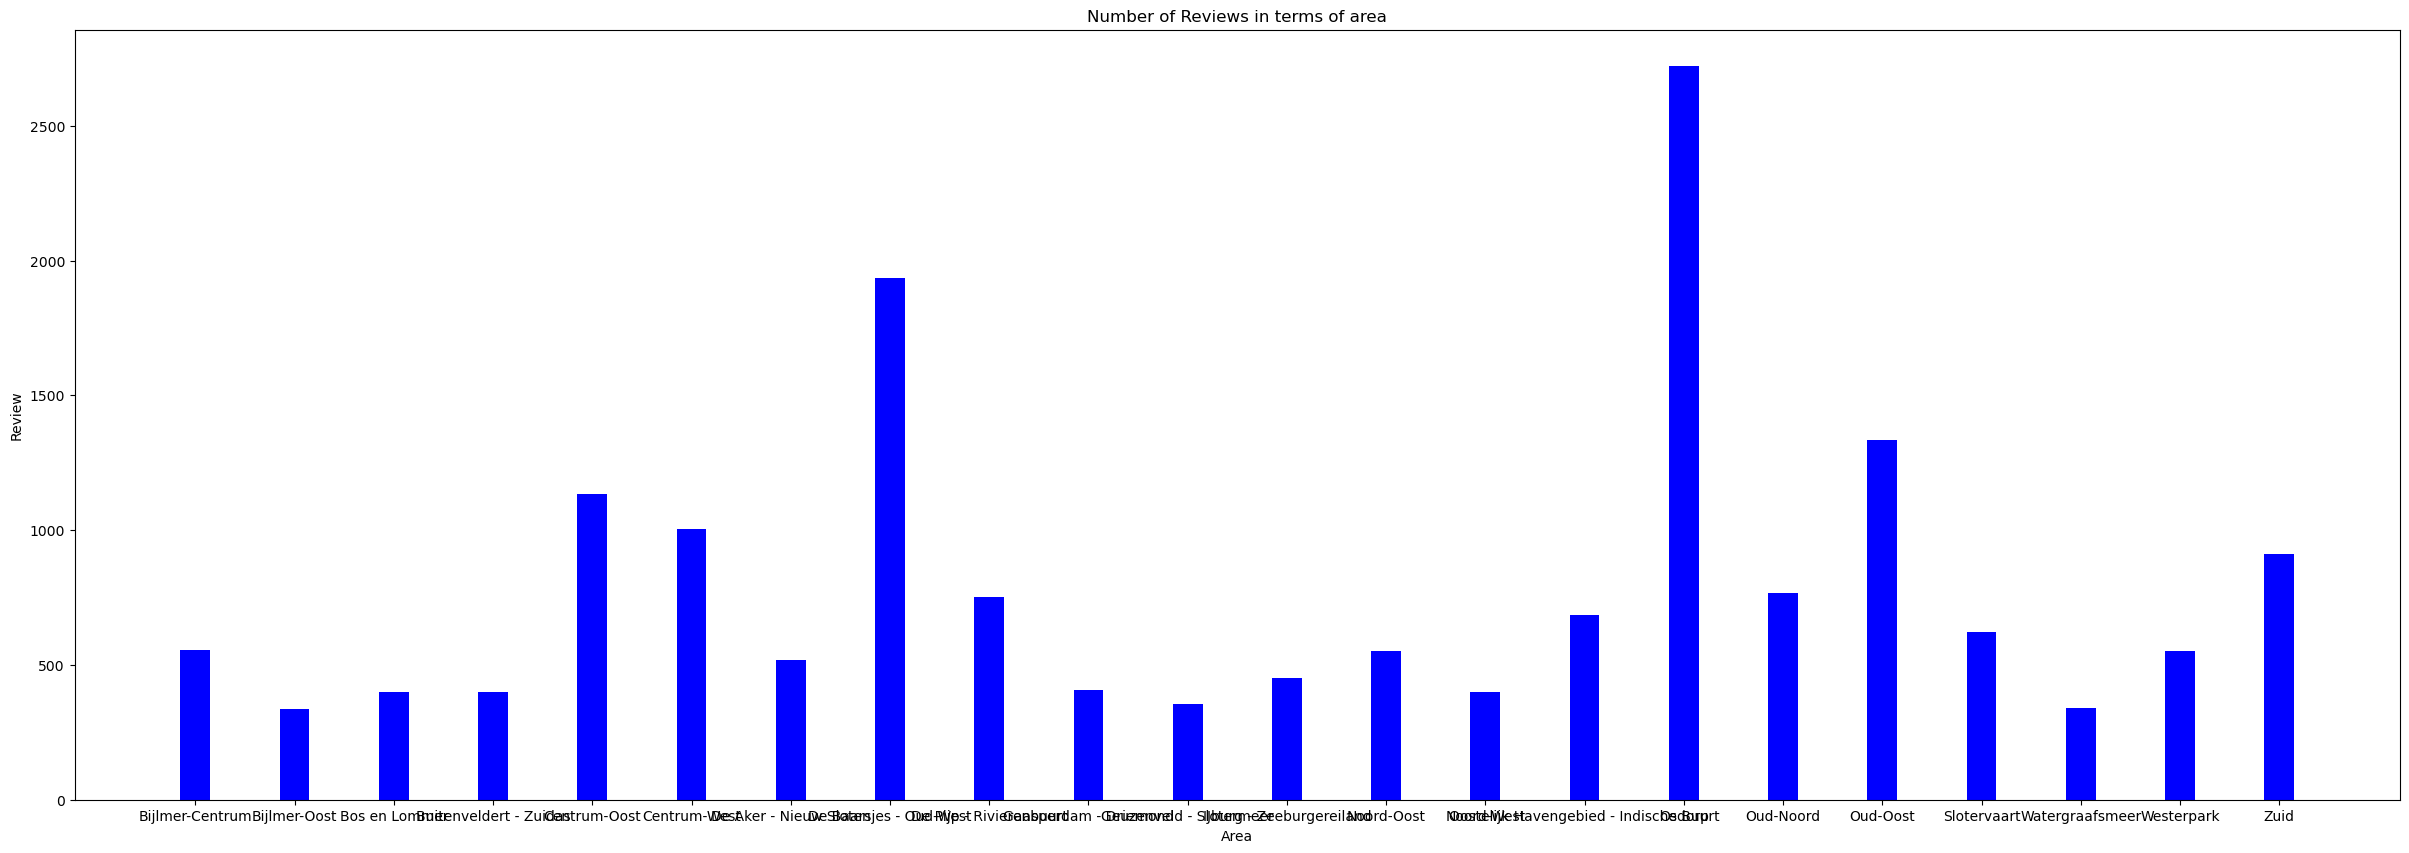

In [176]:
area = area_reviews['neighbourhood']
review = area_reviews['number_of_reviews']
fig = plt.figure(figsize =(30,10))

plt.bar(area, review, color ="blue", width =0.3)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.show()
     

In [177]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)
     

,price,number_of_reviews
0,0,318
1,18,42
2,30,17
3,31,261
4,35,52
5,36,0
6,39,12
7,40,232
8,42,55
9,43,5


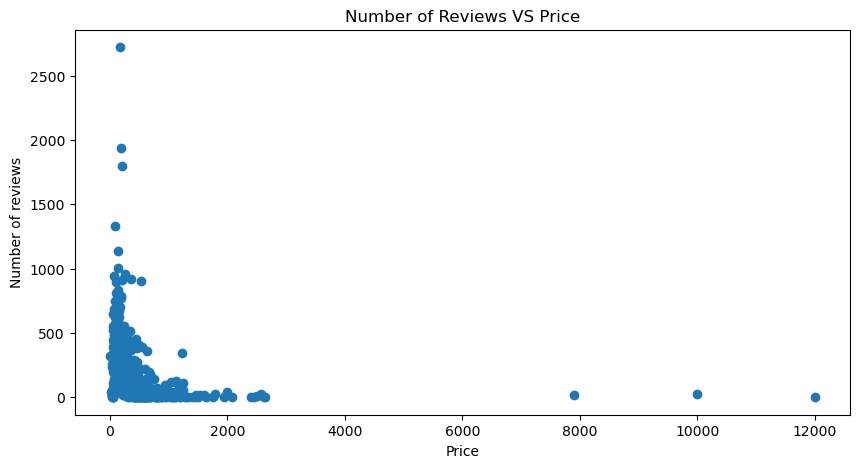

In [178]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()
     

# From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas

## 4.Which hosts are the busiest and why is the reason?

In [179]:
busy_hosts = df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

,host_id,host_name,room_type,number_of_reviews
6249,407017762,Jean Paul,Private room,2720
5811,243087395,CityHub,Hotel room,1934
6132,363404652,Conscious Hotel The Tire Station,Private room,1794
5851,251479377,Generator,Shared room,1334
741,4221960,Peter,Private room,1134
19,186729,Shawna,Entire home/apt,1005
386,2586026,Nathalie,Entire home/apt,955
5850,251479377,Generator,Private room,916
802,4443833,Nova Team,Entire home/apt,911
5745,228208519,Eric,Entire home/apt,906


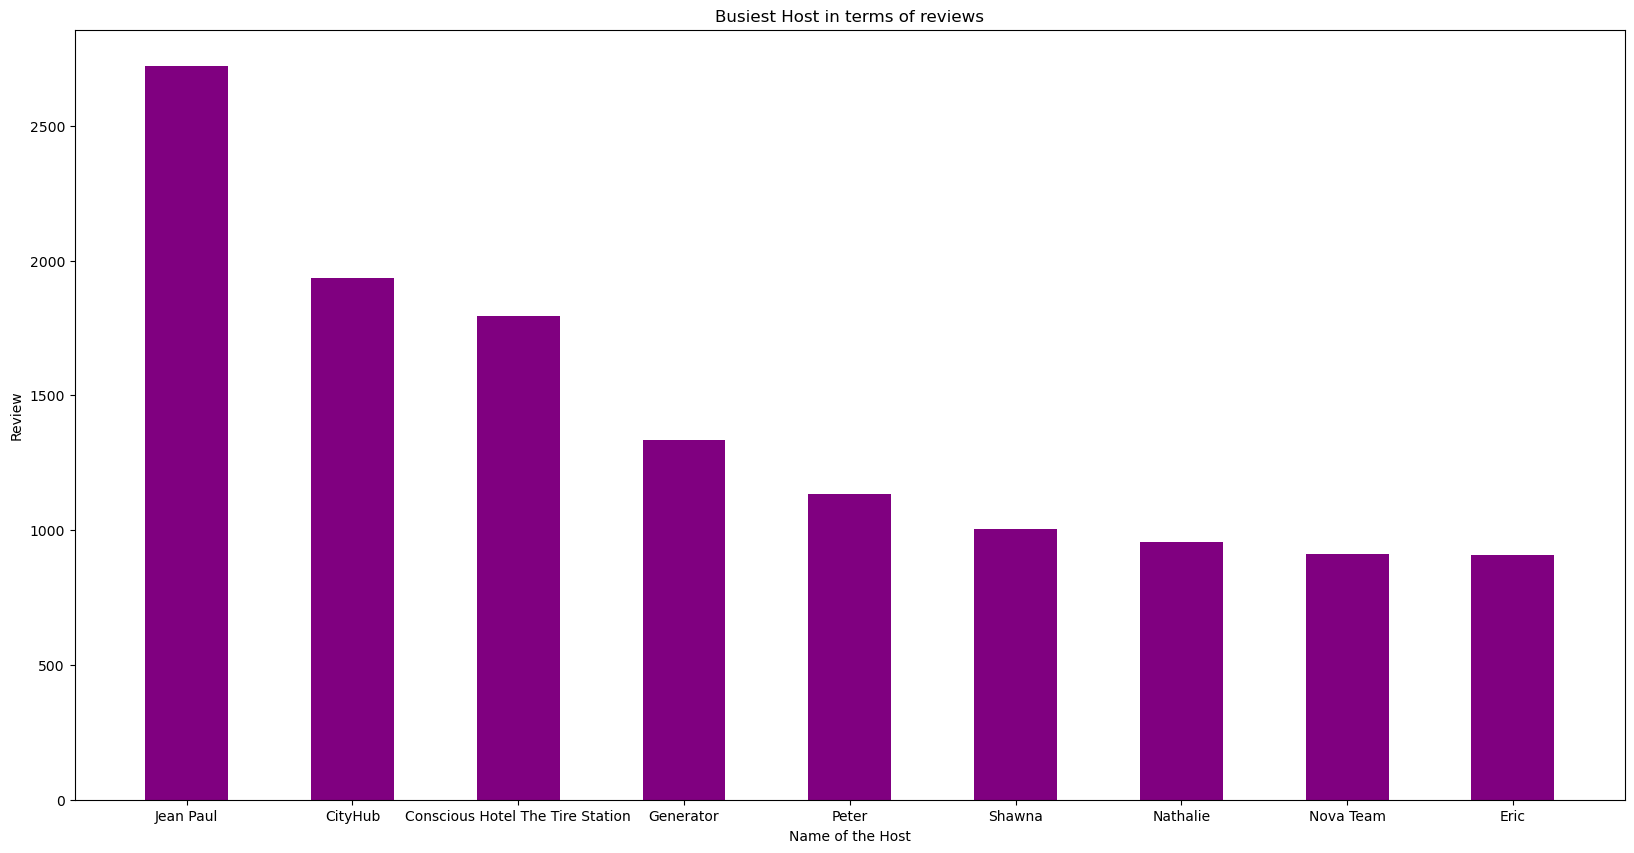

In [180]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(20,10))

plt.bar(name_hosts,review_got, color ='purple', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.show()
     

## We have found Busiest hosts :
1.Jean Paul
2.CityHub
3.Conscious Hotel
4.the tire station
5.Generator
Because these hosts listed their room type as hotel,shared and Private room which is preferred by most number of people and also their reviews are higher.

# 5. Which Hosts are charging higher price?

In [181]:
Highest_price= df.groupby(['host_id','host_name','room_type','neighbourhood'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price
     

,host_id,host_name,room_type,neighbourhood,price
4944,93743075,Kelsey,Private room,Centrum-Oost,12000
1820,10428722,Yaap,Entire home/apt,Centrum-West,10000
668,3884675,Devran,Entire home/apt,Centrum-West,7900
2570,18081564,Steven,Entire home/apt,Oud-Noord,2647
2938,22879651,Wamme,Private room,IJburg - Zeeburgereiland,2575
6000,269014975,Linus,Entire home/apt,De Baarsjes - Oud-West,2500
814,4456680,Neal Estate,Entire home/apt,De Aker - Nieuw Sloten,2450
4315,57865143,Laurens,Entire home/apt,Oud-Noord,2400
1754,9913279,Veronika,Entire home/apt,Centrum-Oost,2083
6184,340475366,Monika,Entire home/apt,De Baarsjes - Oud-West,2000


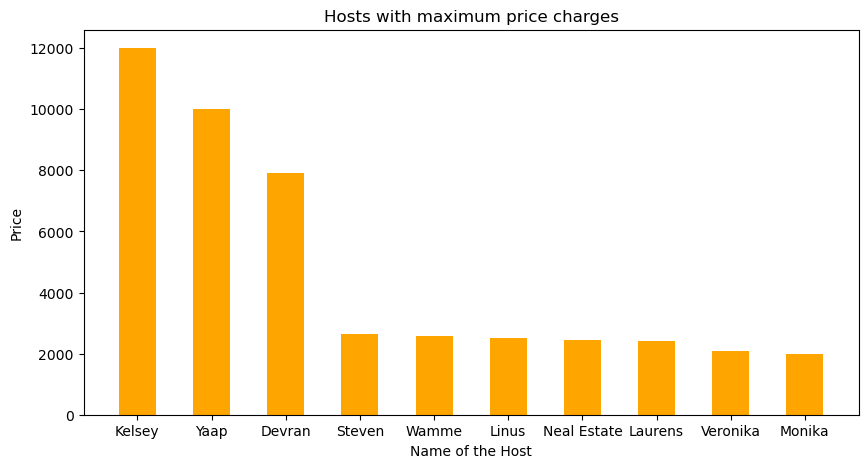

In [182]:
name_of_host = Highest_price ['host_name']
price_charge = Highest_price['price']

fig = plt.figure(figsize =(10,5))

plt.bar(name_of_host,price_charge , color ='orange', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.show()

Now we have seen that 10 Hosts who are charging maximum price:
kelsy, Yaap, Devran, Steven, Wamme, Linus, Neal Estate, Laurens, Veronika, Monika

Max Price is 12000 USD

# 6. Is there any traffic difference among different areas and what could be the reason for it?

In [183]:
traffic_areas = df.groupby(['neighbourhood','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by ='minimum_nights',ascending = False).head(10)
traffic_areas
     

,neighbourhood,room_type,minimum_nights
20,De Baarsjes - Oud-West,Entire home/apt,1057
24,De Pijp - Rivierenbuurt,Entire home/apt,740
13,Centrum-West,Entire home/apt,562
9,Centrum-Oost,Entire home/apt,474
59,Westerpark,Entire home/apt,461
63,Zuid,Entire home/apt,402
15,Centrum-West,Private room,384
50,Oud-Oost,Entire home/apt,380
4,Bos en Lommer,Entire home/apt,338
46,Oud-Noord,Entire home/apt,251


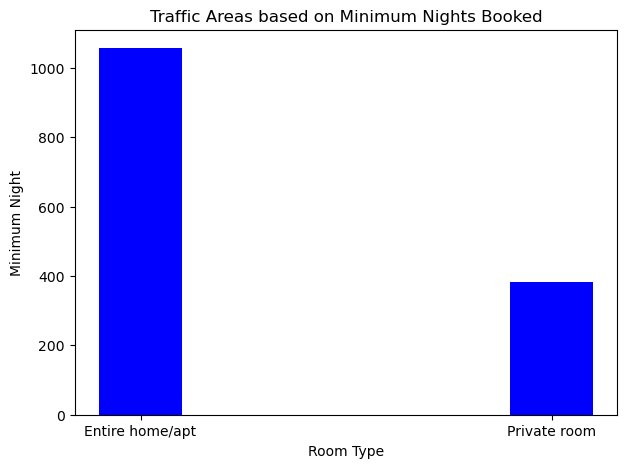

In [184]:
areas_Traffic = traffic_areas['room_type']
room_stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize =(7,5))

plt.bar(areas_Traffic,room_stayed, color ="blue", width = 0.2)

plt.xlabel("Room Type")
plt.ylabel("Minimum Night")
plt.title("Traffic Areas based on Minimum Nights Booked")
plt.show()
     

From this visualization We found that most of the people likely to stay at Entire home and Private room which are present also vistors referring stay in room which listing price is less.

# 7. What is the correlation between different variables ?

C:\Users\007\AppData\Local\Temp\ipykernel_6640\3781297762.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr( method = "kendall")


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

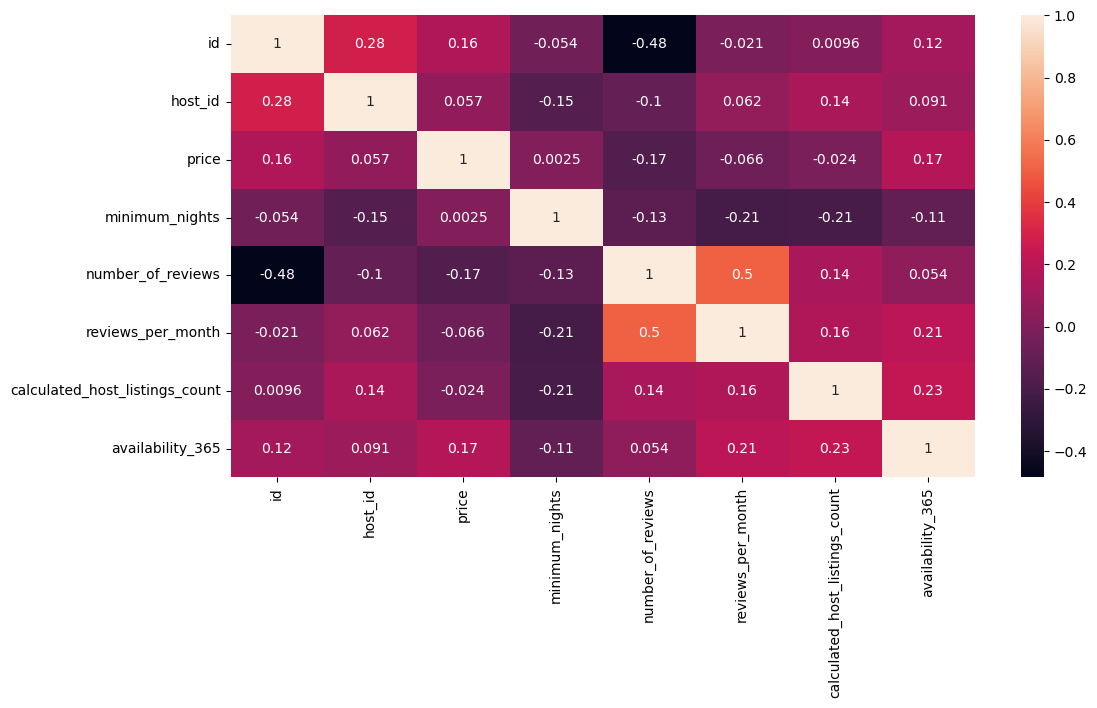

In [185]:
corr = df.corr( method = "kendall")
fig =plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True)
df.columns
     

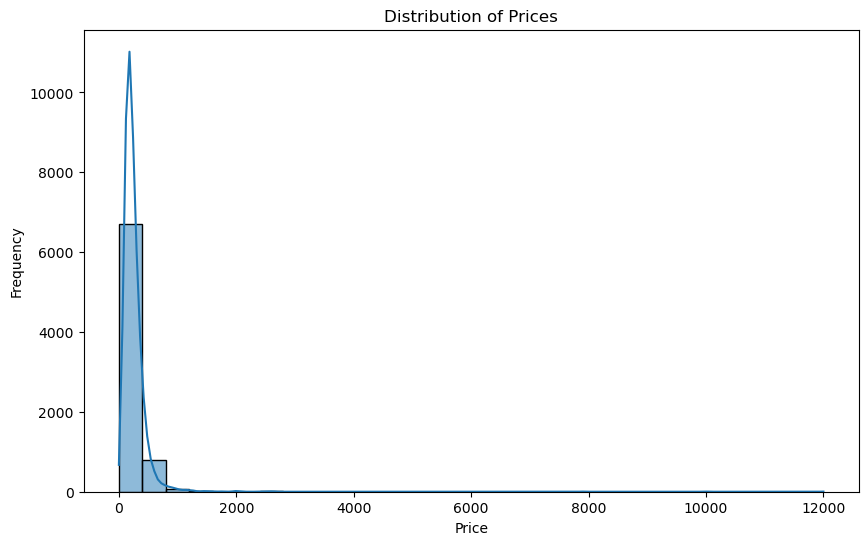

In [187]:
# Price Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

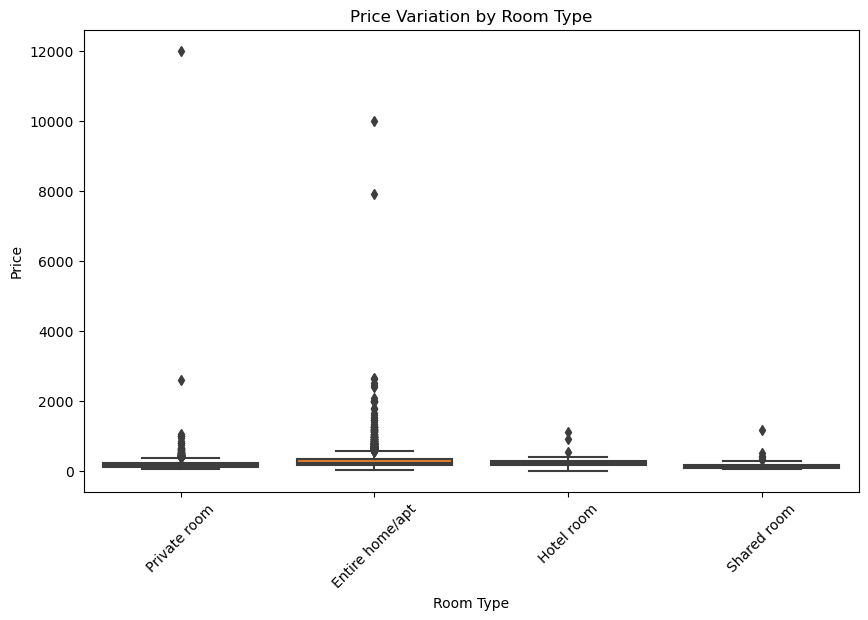

In [188]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Variation by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

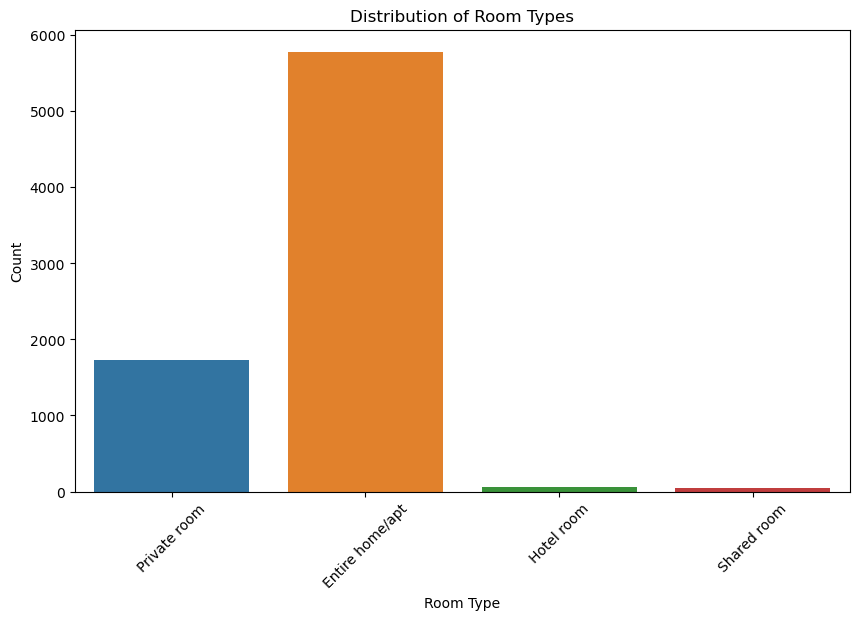

In [189]:
# Room Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Conclusion:

1.We find that Host name Jean Paul has listed highest number of listings  followed by CityHub.




2.We found that Entire home/apt is the highest number of room types overall

3.From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas.

4.We have found Busiest hosts

5.Now we have seen that 10 Hosts who are charging maximum price

6.From this visualization We found that most of the people likely to stay at Entire home and shared room which are present 

7.We have seen all the correlation between different variables

# Thank you